In [11]:
from playsound import playsound
import scipy
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

In [12]:
#playsound('p1_v1/02-v1-180423_1210_16.wav')

In [13]:
def timecode_by_performance(p):
    if p==0:
        timecode = '180423_1210'
    elif p==1:
        timecode = '180423_1227'
    elif p==2:
        timecode = '180423_1237'
    elif p==3: 
        timecode = '180423_1246'
    elif p==4:
        timecode = '180423_1255'
    elif p==5: 
        timecode = '180423_1303'
    elif p==6: 
        timecode = '180423_1313'
    elif p==7: 
        timecode = '180423_1321'
    return timecode


In [14]:
def wav_by_performance(p,i):
    if i == 0:
        ps = '02-v1'
    elif i == 1:
        ps = '03-v2'
    elif i == 2:
        ps = '04-vl'
    elif i == 3: 
        ps = '05-ce'
    fname = 'S1/{}/{}-{}_16.wav'.format(p+1,ps,timecode_by_performance(p))
    w = scipy.io.wavfile.read(fname)
    s = w[1]
    t_samples = len(s)
    t_sec=np.arange(t_samples)*(1/48000)
    return s, t_samples, t_sec

In [15]:
def seg_times_by_performance(p):
    excel_file = Path('Users/lucas/Python/Quartet/phrase_boundaries_excel/all_{}-{}.xlsx'.format(p+1,timecode_by_performance(p)))
    segment_times = pd.read_excel(excel_file)
    return segment_times

In [16]:
def extract_phrase(instrument,phrase_number,segment_times,sound_w, sample_rate = 48000, print_output = False):
    instruments = ['V1','V2','VL','CE']
    instrument = instruments[instrument]
    t_samples = len(sound_w)
    t_sec=np.arange(t_samples)*(1/sample_rate)
    #seg_start = segment_times[instrument][phrase_number-1]
    #seg_end = segment_times[instrument][phrase_number+12]
    st_m[0] = segment_times['V1'][phrase_number-1]
    st_m[1] = segment_times['V2'][phrase_number-1]
    st_m[2] = segment_times['VL'][phrase_number-1]
    st_m[3] = segment_times['CE'][phrase_number-1]
    seg_start = np.min(st_m)
    st_m[0] = segment_times['V1'][phrase_number+12]
    st_m[1] = segment_times['V2'][phrase_number+12]
    st_m[2] = segment_times['VL'][phrase_number+12]
    st_m[3] = segment_times['CE'][phrase_number+12]

    seg_end = np.min(st_m)
    index = np.where(t_sec<=seg_start)
    sample_begin = len(index[0])
    index = np.where(t_sec<=seg_end)
    sample_end = len(index[0])
    if print_output:
        print('our range for violin1 phrase1 is from {} to {}'.format(sample_begin,sample_end))
    phrase = np.array(sound_w[sample_begin:sample_end])
    return phrase

In [17]:
performance = 3
instrument = 1
phrase = 1
segment_times = seg_times_by_performance(performance)
sound, n_samples, t_sec = wav_by_performance(performance,instrument)
print(segment_times)

FileNotFoundError: [Errno 2] No such file or directory: 'Users/lucas/Python/Quartet/phrase_boundaries_excel/all_4-180423_1246.xlsx'

In [26]:
st_m = np.zeros(4,)
len(st_m)
st_m[0] = segment_times['V1'][1]
st_m[1] = segment_times['V2'][1]
st_m[2] = segment_times['VL'][1]
st_m[3] = segment_times['CE'][1]

print(st_m)
print(np.min(st_m))

[55.648081 55.642198 55.751038 55.634076]
55.634076


In [28]:
phrase1_v1 = extract_phrase(instrument,phrase,segment_times,sound,print_output=True)

our range for violin1 phrase1 is from 697517 to 1159093


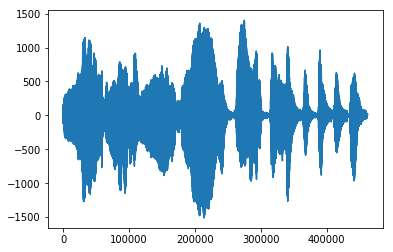

In [29]:
plt.plot(phrase1_v1)

In [30]:
for performance in range(0,8):
    segment_times = seg_times_by_performance(performance)
    for instrument in range(0,3):
        sound, n_samples, t_sec = wav_by_performance(performance,instrument)
        for phrase in range(1,13):
            phrase_out = extract_phrase(instrument,phrase,segment_times,sound)
            np.save('output\phrase{}_{}_{}.npy'.format(performance,phrase,instrument),phrase_out)

In [31]:
from scipy import signal

In [32]:
b, a = signal.butter(3, 0.001)

In [33]:
v1 = np.load('output\phrase0_1_0.npy')
v2 = np.load('output\phrase0_1_1.npy')

In [34]:
a_v1 = np.abs(v1)
a_v2 = np.abs(v2)

fa_v1 = signal.filtfilt(b, a, a_v1)
fa_v2 = signal.filtfilt(b, a, a_v2)

C:\Users\LIVELabWorkstation1\Anaconda3\envs\quartet\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


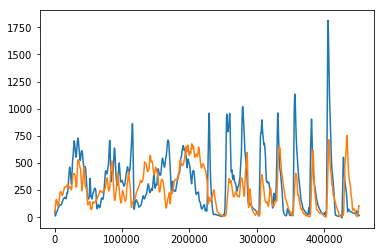

In [35]:
plt.plot(fa_v1)
plt.plot(fa_v2)

In [55]:
corr = np.correlate(fa_v1,fa_v2)

In [56]:
corr

array([4.65843760e+10, 4.65836307e+10, 4.65828842e+10, ...,
       4.13404879e+10, 4.13387884e+10, 4.13370892e+10])

In [58]:
np.size(corr)

3113

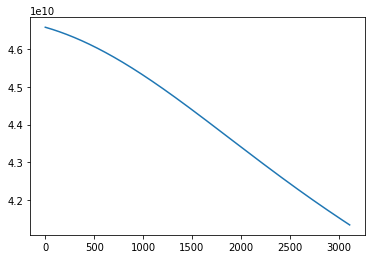

In [59]:
plt.plot(corr)

In [2]:
import os
os.getcwd()

'/Users/lucas/OneDrive - McMaster University/String Quartet'